In [2]:
import sys
!{sys.executable} -m pip install camb

In [3]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at C:\Users\lenovo\anaconda3\lib\site-packages\camb


In [4]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#tau = np.random.uniform(0.6,1.0)
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [5]:
results = camb.get_results(pars)
print(results)

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2650
   max_l_tensor = 600
   max_eta_k = 6625.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.122
   omk = 0.0
   omnuh2 = 0.0006451383989381787
   H0 = 67.5
   TCMB = 2.7255
   YHe = 0.24524332588411976
   num_nu_massless = 2.030666666666667
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0153333333333332]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

(0.6402717552235696, 0.11524891594024253)
0.8586844447744579
Note: redshifts have been re-sorted (earliest first)
[0.08267865 0.08606377 0.08973711 0.09373694 0.09810853 0.10290591
 0.10819395 0.1140513  0.12057411 0.1278811  0.13612046 0.14547935
 0.15619701 0.16858345 0.18304603 0.20012751 0.22056057 0.24534366
 0.27583811 0.31386226]
(0.43914306467337205, 0.07904575164120696)
0.8024656054610495
Note: redshifts have been re-sorted (earliest first)
[0.06635452 0.06905491 0.07198244 0.07516661 0.07864212 0.08245009
 0.0866395  0.09126915 0.09641006 0.10214862 0.10859066 0.11586669
 0.12413853 0.13360764 0.14452487 0.15720082 0.17201343 0.18940462
 0.20984764 0.23374952]
(0.5478725961324752, 0.09861706730384553)
0.7081110854787253
Note: redshifts have been re-sorted (earliest first)
[0.06536002 0.06802928 0.07092478 0.0740763  0.07751904 0.08129483
 0.08545383 0.09005657 0.09517673 0.1009048  0.10735297 0.11466165
 0.12300832 0.13261962 0.14378746 0.1568904  0.17242035 0.19101144
 0.213

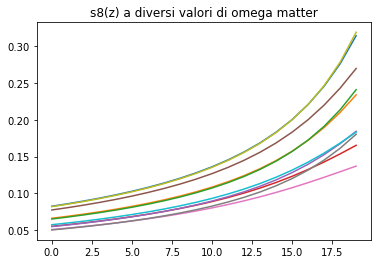

  (10, 20)
  [[1.         0.99999829 0.99999205 0.99997907 0.99995609 0.99991838
  0.99985894 0.99976743 0.99962855 0.99941957 0.99910677 0.99864035
  0.99794747 0.99692338 0.99542174 0.99324712 0.99015561 0.9858721
  0.98012835 0.97270772]
 [0.99999829 1.         0.99999772 0.99998932 0.99997171 0.9999403
  0.99988829 0.9998056  0.99967722 0.9994808  0.9991831  0.99873484
  0.99806379 0.99706588 0.99559539 0.99345733 0.9904078  0.98617085
  0.9804761  0.97310305]
 [0.99999205 0.99999772 1.         0.99999692 0.99998551 0.99996137
  0.99991795 0.99984545 0.99972921 0.99954734 0.99926709 0.99883983
  0.99819405 0.99722643 0.995792   0.99369629 0.99069541 0.98651246
  0.98087463 0.97355696]
 [0.99997907 0.99998932 0.99999692 1.         0.99999579 0.99998011
  0.99994667 0.99988601 0.9997839  0.99961892 0.99935896 0.99895612
  0.99833973 0.99740735 0.9960149  0.9939685  0.9910243  0.98690435
  0.98133298 0.97408016]
 [0.99995609 0.99997171 0.99998551 0.99999579 1.         0.9999942
  0.99

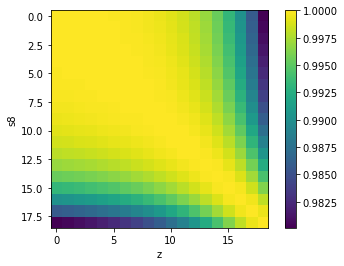

In [6]:
matrice_sigma8 = []

#chiama camb e calcola s8
pars0 = camb.CAMBparams()
def var_da_somma(somma):
    dm = somma/1.18
    bm=dm*0.18
    return dm,bm

for i in range(10):   
    somma = np.random.uniform(0.1,1.0)
    print(var_da_somma(somma))
    
    bm, dm =var_da_somma(somma)      
    h = np.random.uniform(0.5,1.0)  
    print(h)
    #H0=67.5
    H0 = h*100
    ns = np.random.uniform(0.6,1.0)
    tau = np.random.uniform(0.6,1.0)
    pars0.set_cosmology(H0=H0, ombh2=bm*h**2, omch2=dm*h**2, tau=tau)
    pars0.InitPower.set_params(ns=ns)
#Note non-linear corrections couples to smaller scales than you want
    redshifts= np.linspace(0,3,20)
    pars0.set_matter_power(redshifts, kmax=2.0)

#Linear spectra
    pars0.NonLinear = model.NonLinear_none
    results = camb.get_results(pars0)
#kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    s80 = np.array(results.get_sigma8())
    print(results.get_sigma8())
    matrice_sigma8.append(s80)
matrice_sigma8=np.array(matrice_sigma8) 
plt.plot(matrice_sigma8.T)
plt.title('s8(z) a diversi valori di omega matter')
plt.show()
#differenze relative o rispetto a media
#al posto di H0 cambio densità materia tenendo cost rapporto con  CDM e considero H0 squared
plt.xlabel('z');
plt.ylabel('s8');
#plt.legend(['H0 standard','H0+10%', 'H0-10%'], loc='upper left');

#salvo i risultati
#risultati =[]
#risultati.append(results.get_sigma8())
#print(risultati)
sigma8_corr=np.corrcoef(matrice_sigma8.T)
print(" ", np.shape(matrice_sigma8))
print(" ", sigma8_corr)
#import append
#results.append(s80)
#results.append(s80)
#converto results in array
#arr=[results]
#x=np.arr=[risultati]


#cov e corr su tutto
from matplotlib.colors import LogNorm
dx, dy= 0.015, 0.05
y,x = np.mgrid[slice(0.2,1.0 + dy, dy),
               slice(0.2,1.0 + dx, dx)]
z = (sigma8_corr)
z=z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
#c = plt.imshow(z, cmap ='Greens', vmin=z_min, vmax=z_max,
 #               extent =[x.min(), x.max(), y.min(), y.max()], 
  #                 interpolation = 'nearest' , origin ='lower')

c=plt.imshow(z)
plt.colorbar(c)
plt.show()
#print(risultati)
